In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [2]:
dir1 = '/Users/kmanj/Manjavacas Research/Zhou_16_20_22/2M1207b/'
dir2 = '/Users/kmanj/Manjavacas Research/Zhou_16_20_22/SIPS J1256-1257B/'

In [3]:
data1 = pd.read_csv(dir1 + 'F125W_Lightcurve.dat', delimiter = ' ', header=None)
data2 = pd.read_csv(dir1 + 'F160W_Lightcurve.dat', delimiter = ' ', header=None)

In [4]:
Reference = 'Zhou et al 2016 ApJ 818 176'
Telescope = 'Hubble Space Telescope'
Object = '2MASS J12073346-3932539b'
SpectralType = 'L3'
Jmag = '20 +/- 0.2'
Hmag = '18.09 +/- 0.21'
Kmag = '16.93 +/- 0.11'
RA = 181.8899167942
DEC = -39.54785886428
Instrument = 'HST/WFC3'
Date_obs = 'April 11th, 2014'
filter_1 = 'F125W'
filter_2 = 'F160W'
TSTART = 56758.33873800
TSTOP = 56758.70368100
dir_save = "C:/Users/kmanj/FITS_BD_Files/Data/Zhou_16_20_22/"

In [5]:
data1[0]

0     0.000
1     0.000
2     0.030
3     0.059
4     0.192
      ...  
66    8.446
67    8.476
68    8.608
69    8.638
70    8.668
Name: 0, Length: 71, dtype: float64

<Axes: xlabel='Time [JD]', ylabel='Flux'>

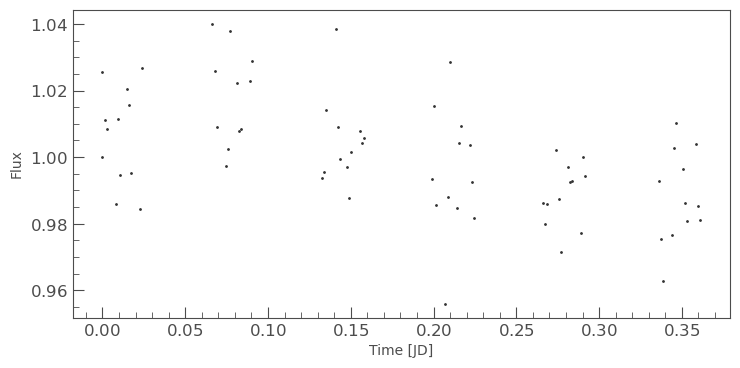

In [6]:
lc = l.LightCurve(time = list(data1[0])*u.h, flux = list(data1[1]) *u.dimensionless_unscaled)
lc.scatter()

In [7]:
lc.to_fits(path = dir_save + '2M1207b_F125W_Zhou2016.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001FFD8750DC0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001FFD8750A90>]

In [8]:
with fits.open(dir_save + '2M1207b_F125W_Zhou2016.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs
    f[0].header['TSTART'] = TSTART
    f[0].header['TSTOP'] = TSTOP
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = Telescope
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = filter_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag

<Axes: xlabel='Time [JD]', ylabel='Flux'>

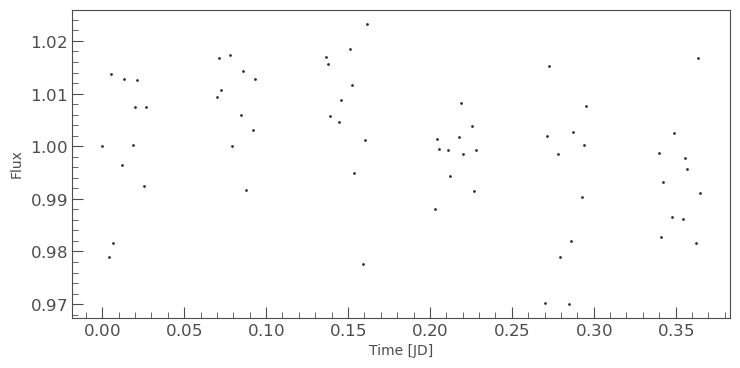

In [9]:
lc = l.LightCurve(time = list(data2[0])*u.h, flux = list(data2[1]) *u.dimensionless_unscaled)
lc.scatter()

In [10]:
lc.to_fits(path = dir_save + '2M1207b_F160W_Zhou2016.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001FFD8BC4FD0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001FFD871A2C0>]

In [11]:
with fits.open(dir_save + '2M1207b_F160W_Zhou2016.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs
    f[0].header['TSTART'] = TSTART
    f[0].header['TSTOP'] = TSTOP
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = Telescope
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = filter_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag

#### SIPS J1256-1257B

In [21]:
dwarfs_files = os.listdir(dir2)
dwarf_dat = [archive for archive in dwarfs_files]
dwarf_dat

['VHS1256_LightCurve_Spitzer.dat',
 'VHS1256_LightCurve_WFC3_F127M.dat',
 'VHS1256_LightCurve_WFC3_F139M.dat',
 'VHS1256_LightCurve_WFC3_F153M.dat',
 'VHS1256_LightCurve_WFC3_white.dat']

In [22]:
Reference = 'Zhou et al 2020 AJ 160 77'
Telescope = 'Spitzer Space Telescope'
Object = 'SIPS J1256-1257B'
SpectralType = 'L7'
Jmag = '16.66 ± 0.29'
Hmag = '15.6 ± 0.21'
Kmag = '14.57 ± 0.12'
RA = 194.00768502
DEC = -12.95774315
Instrument = 'Spitzer/IRAC'
Date_obs = 'November 14th, 2019'
Band_obs = 'Channel 2 (4.5 micron)'
TSTART = 58801.23958333
TSTOP = 58802.76180556
dir_save = "C:/Users/kmanj/FITS_BD_Files/Data/Zhou_16_20_22/"

In [23]:
data0 = pd.read_csv(dir2 + 'VHS1256_LightCurve_Spitzer.dat', delimiter = ' ', header=None)
data0

,0,1,2
0,2.458802e+06,0.952605,0.014251
1,2.458802e+06,0.976107,0.014108
2,2.458802e+06,0.966219,0.016404
3,2.458802e+06,0.969428,0.017506
4,2.458802e+06,0.990193,0.012348
...,...,...,...
7963,2.458803e+06,1.037398,0.008679
7964,2.458803e+06,1.013657,0.012695
7965,2.458803e+06,1.043862,0.009042
7966,2.458803e+06,1.010342,0.006949


In [24]:
t = []

for i in data0[0]:
    t.append(i - 2400000.5)
    
t

[58801.260592364706,
 58801.260717640165,
 58801.26089985948,
 58801.261082078796,
 58801.26126429811,
 58801.26144651743,
 58801.26162873674,
 58801.26181909116,
 58801.262032649014,
 58801.26221488323,
 58801.26239711698,
 58801.26257935073,
 58801.26276158448,
 58801.2629438187,
 58801.26312605245,
 58801.263316421304,
 58801.263530103024,
 58801.263712336775,
 58801.26389457099,
 58801.26407680474,
 58801.26425903849,
 58801.26444127178,
 58801.26462350553,
 58801.26481387578,
 58801.26502709417,
 58801.26520932792,
 58801.26539156167,
 58801.26557379542,
 58801.265756028704,
 58801.26593826292,
 58801.26612049667,
 58801.266310865525,
 58801.26652547298,
 58801.2667077072,
 58801.26688994095,
 58801.267072175164,
 58801.267254408915,
 58801.2674366422,
 58801.267618876416,
 58801.267809245735,
 58801.26802154491,
 58801.26820379263,
 58801.268386040814,
 58801.268568289,
 58801.26875053765,
 58801.26893278537,
 58801.26911503449,
 58801.26930541871,
 58801.26951910788,
 58801.2697

In [25]:
type(t)

list

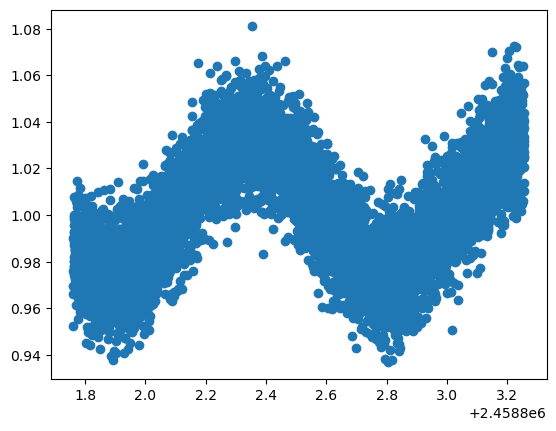

In [26]:
plt.scatter(data0[0], data0[1])

In [27]:
t = list(data0[0]) *u.d
flux = list(data0[1]) *u.dimensionless_unscaled
eflux = list(data0[2])*u.dimensionless_unscaled

In [33]:
data0[0]

0       2.458802e+06
1       2.458802e+06
2       2.458802e+06
3       2.458802e+06
4       2.458802e+06
            ...     
7963    2.458803e+06
7964    2.458803e+06
7965    2.458803e+06
7966    2.458803e+06
7967    2.458803e+06
Name: 0, Length: 7968, dtype: float64

In [32]:
lc = l.LightCurve(time = list(data0[0]) *u.h, flux = list(data0[1]) *u.dimensionless_unscaled, flux_err = list(data0[2])*u.dimensionless_unscaled)
lc.scatter()

ValueError: Input values did not match the format class jd:
TypeError: Input values for jd class must be finite doubles

In [ ]:
lc.to_fits(path = dir_save + 'SIPS J1256-1257B_Zhou2020')